In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/selected_M_best9.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1655864  ILMN_1657898  ILMN_1687526  ILMN_1763364  ILMN_1775304  \
0        9.1206        8.9263        9.5725       10.6200       11.6864   
1        9.6620        8.6274        9.5859       10.6084       11.9138   
2        8.9047        8.3385        9.1329        9.5347       10.9197   
3        8.7785        8.2053        8.9398        8.7864       10.4650   
4        8.4493        8.2168        8.7135        8.7127       10.2487   

   ILMN_1794233  ILMN_1812970  ILMN_1875248  ILMN_2082762  Results  
0        8.8507        8.9913        8.2650       11.1457  control  
1        8.7934        9.1648        8.7945       11.7188  control  
2        8.6468        8.4208        8.5512       10.8772  control  
3        8.4454        8.2253        8.4394       10.2786  control  
4        8.5345        8.0290        8.4529       10.1435  control  


In [3]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

In [4]:
df['Results'] = df['Results'].apply(map_results)
print(df.head())

   ILMN_1655864  ILMN_1657898  ILMN_1687526  ILMN_1763364  ILMN_1775304  \
0        9.1206        8.9263        9.5725       10.6200       11.6864   
1        9.6620        8.6274        9.5859       10.6084       11.9138   
2        8.9047        8.3385        9.1329        9.5347       10.9197   
3        8.7785        8.2053        8.9398        8.7864       10.4650   
4        8.4493        8.2168        8.7135        8.7127       10.2487   

   ILMN_1794233  ILMN_1812970  ILMN_1875248  ILMN_2082762  Results  
0        8.8507        8.9913        8.2650       11.1457        0  
1        8.7934        9.1648        8.7945       11.7188        0  
2        8.6468        8.4208        8.5512       10.8772        0  
3        8.4454        8.2253        8.4394       10.2786        0  
4        8.5345        8.0290        8.4529       10.1435        0  


In [5]:

df.describe()

,ILMN_1655864,ILMN_1657898,ILMN_1687526,ILMN_1763364,ILMN_1775304,ILMN_1794233,ILMN_1812970,ILMN_1875248,ILMN_2082762,Results
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,8.840350,8.361906,9.035799,9.550994,10.817113,8.665949,8.365388,8.377289,10.579364,0.707143
std,0.551345,0.348476,0.539149,0.676179,0.880402,0.390432,0.479864,0.385426,0.766060,0.456707
min,7.867800,7.708100,8.050000,8.400000,8.496600,8.013300,7.618600,7.758800,8.692200,0.000000
25%,8.413500,8.128750,8.630825,9.029625,10.226825,8.394500,8.018450,8.110900,10.006300,0.000000
50%,8.688850,8.254400,8.895850,9.477850,10.762350,8.539800,8.155100,8.260100,10.407700,1.000000
75%,9.193275,8.539750,9.337525,10.091750,11.431350,8.840075,8.649025,8.596925,11.145700,1.000000
max,10.372400,9.626600,10.546200,11.213100,12.968600,9.946000,9.860400,9.530000,12.434900,1.000000


In [6]:
df_features = list(df.columns)
print(df_features)
print(len(df.columns))

['ILMN_1655864', 'ILMN_1657898', 'ILMN_1687526', 'ILMN_1763364', 'ILMN_1775304', 'ILMN_1794233', 'ILMN_1812970', 'ILMN_1875248', 'ILMN_2082762', 'Results']
10


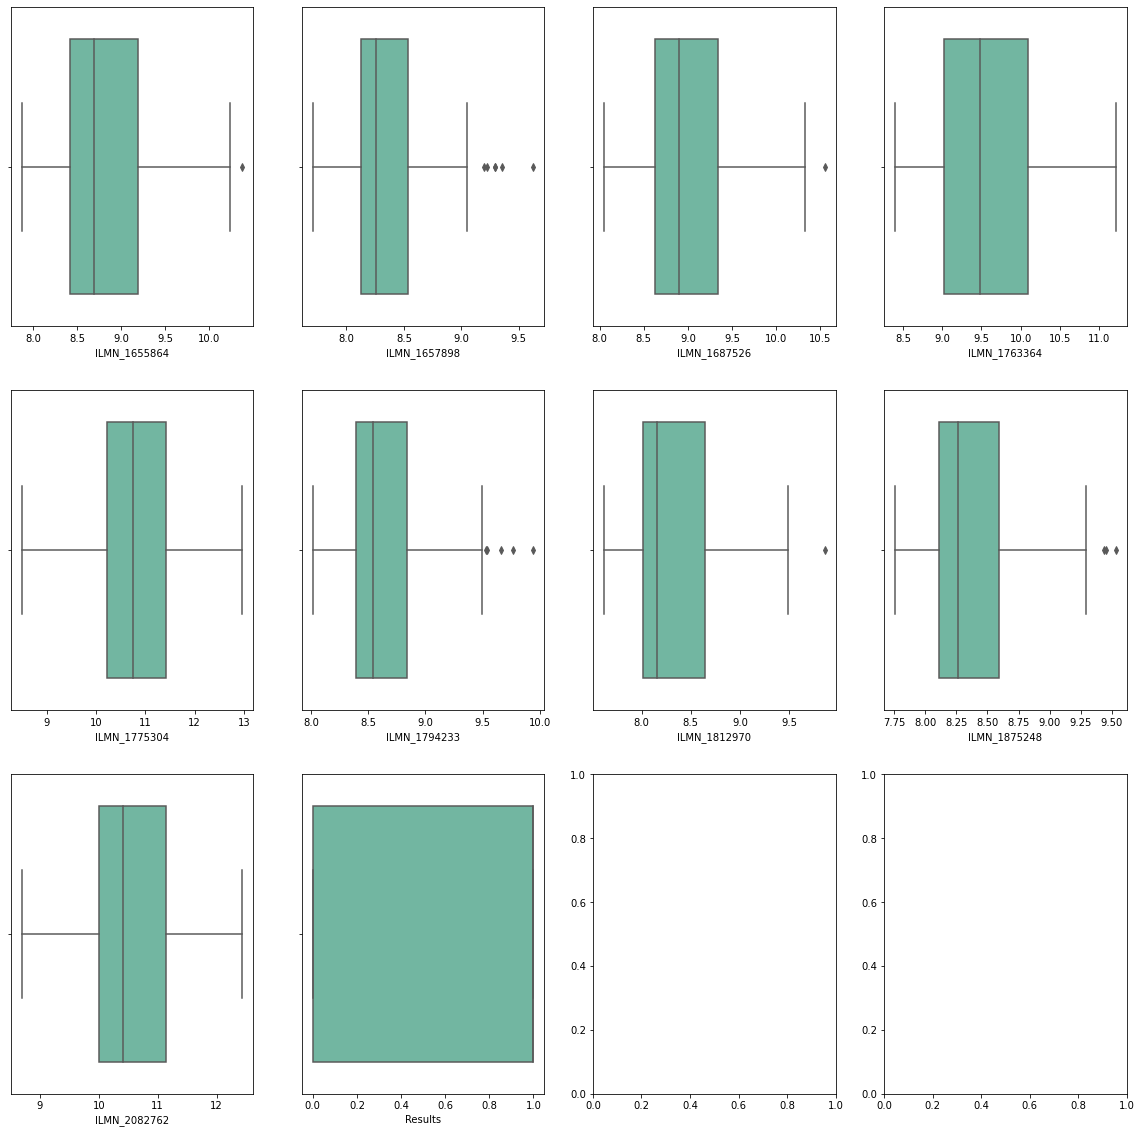

In [7]:
fig, axes = plt.subplots(3,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    
    else:
        y_ += 1

In [8]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_02 = pd.DataFrame(data=dat, columns=cols)  
print(df_02.head())

Index(['ILMN_1655864', 'ILMN_1657898', 'ILMN_1687526', 'ILMN_1763364',
       'ILMN_1775304', 'ILMN_1794233', 'ILMN_1812970', 'ILMN_1875248',
       'ILMN_2082762', 'Results'],
      dtype='object')
   ILMN_1655864  ILMN_1657898  ILMN_1687526  ILMN_1763364  ILMN_1775304  \
0      0.500200      0.634975      0.609927      0.789165      0.713283   
1      0.716362      0.479176      0.615295      0.785041      0.764132   
2      0.413998      0.328590      0.433819      0.403363      0.541838   
3      0.363611      0.259161      0.356462      0.137357      0.440161   
4      0.232173      0.265155      0.265804      0.111159      0.391793   

   ILMN_1794233  ILMN_1812970  ILMN_1875248  ILMN_2082762  Results  
0      0.433280      0.612320      0.285795      0.655543      0.0  
1      0.403632      0.689714      0.584745      0.808668      0.0  
2      0.327780      0.357837      0.447380      0.583803      0.0  
3      0.223573      0.270631      0.384259      0.423865      0.0  
4    

In [9]:
x = df_02.drop(["Results"], axis =1);
y = df["Results"]
print(y.value_counts())

1    99
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 99.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

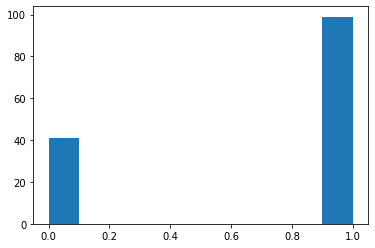

In [10]:
plt.hist(y)

1    58
0    41
Name: Results, dtype: int64


(array([41.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

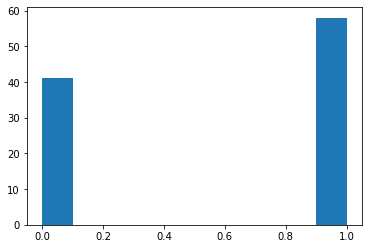

In [11]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.7)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0    58
1    58
Name: Results, dtype: int64


(array([58.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 58.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

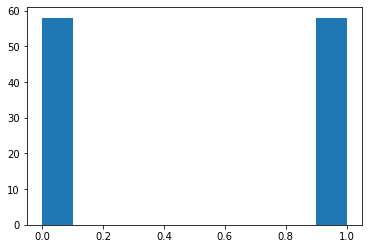

In [12]:
smt = SMOTE()
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [13]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  81.897
Standed deviation :  2.586
CV value :  3
Parameters :  {}
Accuracy :  84.503
Standed deviation :  5.489
CV value :  4
Parameters :  {}
Accuracy :  85.345
Standed deviation :  8.577
CV value :  5
Parameters :  {}
Accuracy :  78.442
Standed deviation :  16.503


In [14]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  81.034
Standed deviation :  3.448
CV value :  3
Parameters :  {'random_state': 1}
Accuracy :  82.839
Standed deviation :  8.386
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  84.483
Standed deviation :  11.040
CV value :  5
Parameters :  {'random_state': 1}
Accuracy :  85.399
Standed deviation :  8.818


In [15]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 5}
Accuracy :  84.483
Standed deviation :  1.724
CV value :  3
Parameters :  {'n_neighbors': 11}
Accuracy :  86.235
Standed deviation :  3.103
CV value :  4
Parameters :  {'n_neighbors': 13}
Accuracy :  86.207
Standed deviation :  9.443
CV value :  5
Parameters :  {'n_neighbors': 13}
Accuracy :  86.268
Standed deviation :  9.931


In [16]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  83.621
Standed deviation :  4.310
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  83.603
Standed deviation :  2.536
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  83.621
Standed deviation :  9.245
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  83.659
Standed deviation :  11.721


In [17]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  82.759
Standed deviation :  5.172
CV value :  3
Parameters :  {}
Accuracy :  80.207
Standed deviation :  3.018
CV value :  4
Parameters :  {}
Accuracy :  75.000
Standed deviation :  7.854
CV value :  5
Parameters :  {}
Accuracy :  77.609
Standed deviation :  8.352


In [18]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'rbf'}
Accuracy :  84.483
Standed deviation :  3.448
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  85.403
Standed deviation :  7.868
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  84.483
Standed deviation :  12.552
CV value :  5
Parameters :  {'kernel': 'poly'}
Accuracy :  87.971
Standed deviation :  9.995


In [19]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 110, 'max_features': 2, 'n_estimators': 200}
Accuracy :  86.207
Standed deviation :  3.448
CV value :  3
Parameters :  {'max_depth': 200, 'max_features': 3, 'n_estimators': 100}
Accuracy :  87.112
Standed deviation :  5.477
CV value :  4
Parameters :  {'max_depth': 80, 'max_features': 3, 'n_estimators': 100}
Accuracy :  87.931
Standed deviation :  11.306
CV value :  5
Parameters :  {'max_depth': 80, 'max_features': 4, 'n_estimators': 100}
Accuracy :  88.841
Standed deviation :  9.275
